# Introducción a la información cuántica con `Qiskit` 

En este notebook vamos a repasar uno por uno los conceptos que expusimos en la clase teórica de *Introducción a la Información Cuántica*, pero esta vez vamos a ir implementandolos en un sistema cuántico real mediante la librería de IBM `Qiskit`. Antes de entrar en materia, vamos a hacer un resumen muy general de esta librería.

### Introducción a `Qiskit`

Citando de la pagina web [www.qiskit.org](https://qiskit.org), se trata de *'un framework open-source para el desarollo de software de computación cuántica'*. Es decir, una plataforma a través de la cual podemos crear diferentes herramientas y algoritmos basados en la información cuántica. Consta de cuatro ramas:

- **Terra:** es la base sobre la que esta construido el resto de la librería. Es donde están definidas las bases con las que generaremos los circuitos sobre los que correran nuestros algoritmos. Terra permite controlar cada uno de los elementos de dicho circuitos, en su forma más fundamental. Al ser la parte más *low-level* de la librería, no entraremos en los detalles durante este curso.

- **Aer:** nos da las herramientas con las que simular los circuitos que creemos. Antes de lanzar nuestro programa a un chip cuántico, a veces queremos comprobar si el circuito que hemos generado hace lo que queríamos que hiciese. Para ello, Aer introduce un serie de simuladores cuánticos con los que llevar a cabo dicha tarea. Al ser simuladores, están basados en computación clásica, por lo que solo nos serán utiles cuando tratemos con sistemas de pocos qbits.

- **Ignis:** nos permite luchar contra el ruido y los errores que puedan aparecer en nuestros circuitos. Como veremos más adelante, los chips cuánticos son herramientas muy precisas, por lo que la aparición de cualquier tipo de ruido perturba los resultados que obtenemos. Solventar estos problemas nos ayuda a crear circuitos más precisos. También nos permite crear nuevos elementos para los circuitos. Al igual que con Terra, no entraremos en los detalles de esta subclase.

- **Aqua:** nos permite importar algoritmos con los que poder solucionar problemas reales. Cuando comencemos a construir nuestros circuitos, veremos que algunos algoritmos son bastante difíciles de implementar. Qiskit pone a nuestro alcance la librería Aqua para no tener que trabajar a nivel de circuitos, si no simplemente importar los diferentes algoritmos cuánticos y implementar el problema que queramos solucionar. Existen algoritmos para Machine Learning, solucionar problemas de química compleja, problemas de finanzas, optimización,...

Para acceder a todas estás herramientas, lo único que necesitamos es importar la librería `Qiskit` a nuestro ordenador. [En esta página](https://qiskit.org/documentation/install.html) encontrareis detalles sobre como instalar dicha librería. Si teneís ya Python (versión minima 3.0) instalado, basta que corraís 
`pip install qiskit`
o
`conda install qiskit` (en caso de que utiliceis anaconda) en vuestro terminal. Una vez lo teneís instalado, podeís comprobar que todo funciona correctamente haciendo

In [2]:
#pip install qiskit
from qiskit import *

Existe otra manera de implementar circuitos cuánticos con Qiskit, usand el `Circuit composer`. Podeís encontrar una guía introductoría en [este enlance](https://quantum-computing.ibm.com/support/guides/getting-started-with-circuit-composer). El Circuit composer nos permite, de manera visual, crear circuitos para luego ejecutarlos en los diferentes chips cuánticos. Al ser una herramienta visual, el Circuit composer no es muy útil de cara a la creación de circuitos complejos, ya que tenemos que *arrastrar* las puertas a cada uno de los canales del circuito. Por tanto, no lo utilizaremos en este curso.

En python, una vez tenemos acceso a la librería `Qiskit`, vamos a implementar los conceptos que estudiamos en la introducción teórica.

## 1 - Single Qubits

Como vimos, los qubits son las unidades básicas de información de los circuitos cuánticos. Para crear un circuito en Qiskit basta con llamar a la función `QuantumCircuit` y declarar cuantos qubits queremos que contenga. De momento, vamos a contentarnos con un solo qubit:

In [2]:
qubit = QuantumCircuit(1)

Podemos ver gráficamente el circuito utilizando

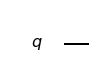

In [3]:
qubit.draw(output='mpl')

Todos los qubits que inicialicemos en Qiskit estarán en el estado $|0\rangle$. Para asegurarnos, vamos medir el estado del qubit. Para poder hacerlo, necesitamos introducir un registro en el cual guardar el valor de las medidas. Lo llamaremos el registro clásico. Vamos a redefinir el circuito para contener un registro clásicos:

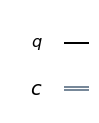

In [4]:
qubit = QuantumCircuit(1, 1) # un qubit, un registro clásico
qubit.draw(output='mpl')

Ahora tenemos un registro cuántico y un registro clásico. Ahora podemos hacer toda serie de medidas que queramos. Vamos a intentar reproducir los resultados que obtuvimos con la esfera de Bloch. Para ello, vamos a definir las medidas sobre el eje $x,y,z$. Las medidas en `Qiskit` siempre se hacen con respecto al eje $z$, por lo que la primera medida es

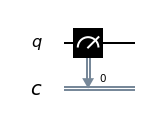

In [5]:
# Medida en z
med_z = QuantumCircuit(1,1)
med_z.measure(0,0)
med_z.draw(output='mpl')

La medida en $x$ la vamos a definir de la manera siguiente (los más avispados ya irán entendiendo que significa la `h` del circuito!)

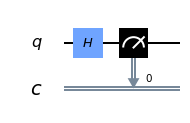

In [16]:
# Medida en x
med_x = QuantumCircuit(1,1)
med_x.h(0)
med_x.measure(0,0)

med_x.draw(output='mpl')

La medida sobre el eje y es la mas compleja de las tres:

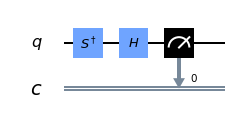

In [13]:
med_y = QuantumCircuit(1,1)
med_y.sdg(0)
med_y.h(0)
med_y.measure(0,0)

med_y.draw(output='mpl')

Ahora vamos a medir el qubit original en estas dos bases. Empezemos por el eje $z$. Para ello, solo tenemos que unir nuestro qubit y la medida:

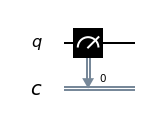

In [14]:
qubit_z = qubit + med_z

qubit_z.draw(output='mpl')

Para ver el resultado de la medición, vamos a importar un simulador de circuitos de Aer llamado `qasm_simulator`. Este simulador será el *backend* sobre el que ejectuemos nuestro circuito:

In [8]:
# Añadimos una libreria para visualizar los resultados
from qiskit.visualization import plot_histogram 

counts = execute(qubit_z,
                 Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

La variable counts nos dice cuantas veces hemos medido cada uno de los estados posibles. En este caso solo teníamos el estado cero, por lo que todas las medidas nos devuelven ese estado.

**Ejercicio:**  
- ¿Como interpretais el resultado anterior? Calcular $p^z_0(|0\rangle)$ y comprobar si os da el mismo resultado.
- ¿Que valor esperais encontrar cuando midais en el eje $x$? Hacer primero la predicción teórica y luego implementadla de la misma forma que hemos implementado la del eje $z$.

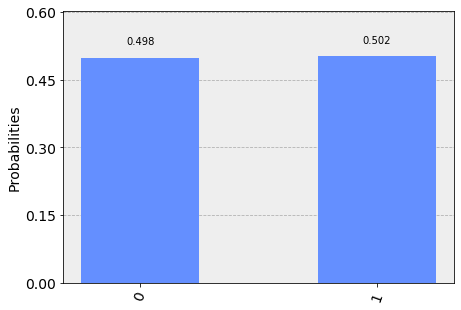

In [23]:
# Solución
# Generamos un qbit
#qbit_zprima = QuantumCircuit(1)
#qbit_zprima.h(0)
qubit_z = qubit + med_x
counts = execute(qubit_z,
                 Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)





Ahora vamos a hacer un cálculo análogo al anterior, pero con un estado inicial diferente. Vamos crear el estado $\frac{|0\rangle+|1\rangle}{\sqrt{2}}$. Como sabemos que los estados se incializan en $x$, simplemente tenemos que aplicar una puerta Hadamard:

In [17]:
qubit_plus = QuantumCircuit(1,1)
qubit_plus.h(0) # Puerta de Hadamard

Si ahora medimos este estado en la base $z$, encontramos

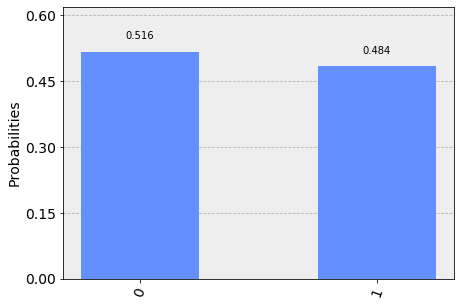

In [18]:
plus_z = qubit_plus + med_z

counts_plus = execute(plus_z,
                 Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts_plus)

Lo anterior quiere decir que nuestro estado está en una superposición equiprobable, por lo que la mitad de veces medimos el estado en $0$ y la otra mitad en $1$. El hecho de que las probabilidades no sean 0.5/0.5 viene del hecho que estamos haciendo un número finito de medidas sobre nuestro backend. Cuantas más medidas, más nos acercaremos al valor exacto. Este número de veces se controla con la variables `shots`. Este es un ejemplo con un valor demasiado pequeño de shots:

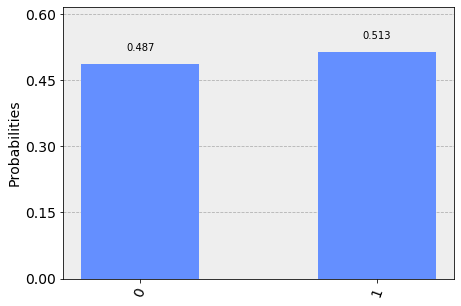

In [27]:
shots = 10000
counts_plus = execute(plus_z,
                      Aer.get_backend('qasm_simulator'),
                      shots = shots).result().get_counts()
plot_histogram(counts_plus)

Como el número de shots es demasiado pequeño, la estadística no es nada buena.

**Ejercicio:** ¿Que probabilidades de encontrar 0 y 1 obtenemos si medimos $|+\rangle$ en la base $x$? Comprobadlo teóricamente y con Qiskit.

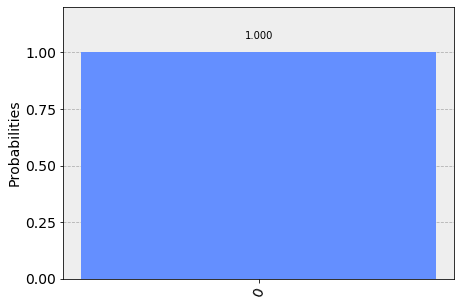

In [28]:
# Solución
plus_x = qubit_plus + med_x

counts_plus = execute(plus_x,
                 Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts_plus)

## 2 - Multiples qubits

De la misma manera que hemos definido un qubit, podemos definir muchos más:

In [54]:
two_qubit = QuantumCircuit(2, 2)

Hemos creado también dos registros clásicos para guardar las medidas que vayamos haciendo. El principio ahora es el mismo que con single qubits. La unica diferencia es que a la hora de aplicar puertas lógicas y medidas, tenemos que especificar el qubit sobre el que queremos actuar. Por ejemplo, si queremos aplicar una puerta de Hadamard sobre el qubit $0$, debemos hacer:

In [55]:
two_qubit.h(0)

Para hacer lo mismo sobre el qubit $1$ hacemos:

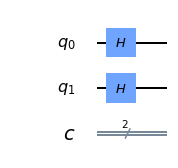

In [56]:
two_qubit.h(1)

two_qubit.draw(output='mpl')

Para hacer medidas, tenemos que asignar que qubit queremos medir y en que registro queremos guardar el resultado. **Tened en cuenta que el output de las medidas esta en orden opuesto al número del qubit, es decir, la medición sobre el qubit cero es el valor del output de más a la derecha y así sucesivamente.**

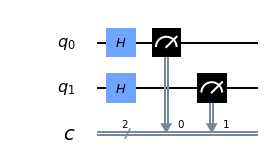

In [49]:
two_qubit.measure(0, 0)
two_qubit.measure(1, 1)

two_qubit.draw(output='mpl')

**Ejercicio:** ¿Cual es el estado actual de nuestro sistema? Haced una propuesta teórica y despues medir ambos qubits en la base $z$ para comprobar el resultado.

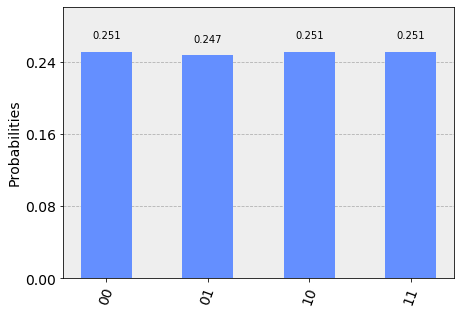

In [63]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.h(1)
circuit.measure(0,0)
circuit.measure(1,1)
circuit.draw()
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit,simulator,shots = 10000)
result = job.result()
counts = result.get_counts(circuit)
plot_histogram(counts)


## 3 - Puertas lógicas cuánticas

Tal y como vimos en la introducción teórica, un circuito cuántico, al igual que un circuto clásico, está compuesto de puertas lógicas. Qiskit nos propociona un libreria bastante extensa de puerta lógicas. Podeis hechar un vistazo a las más importantes en [este link](https://quantum-computing.ibm.com/support/guides/gate-overview) (para acceder necesitareis vuestra cuenta de IBM). Vamos a ver primero unas cuantas puertas lógicas de un solo qubit. En este notebook ya hemos utilzado una bastante típica, la puerta Hadamard:

In [77]:
circuito = QuantumCircuit(1,1)
circuito.h(0) # Puerta de Hadamard

Podemos añadir el número que queramos de puertas a nuestro circuito. Por ejemplo, vamos a aplicar sucesivamente las puertas $X$, $Y$ y $Z$:

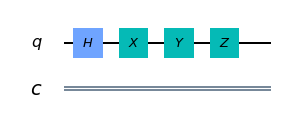

In [78]:
circuito.x(0)
circuito.y(0)
circuito.z(0)

circuito.draw(output = 'mpl')

**Ejercicio:** ¿Cual es el estado actual de nuestro sistema? Haced una propuesta teórica y despues medir ambos qubits en la base $z$ para comprobar el resultado.

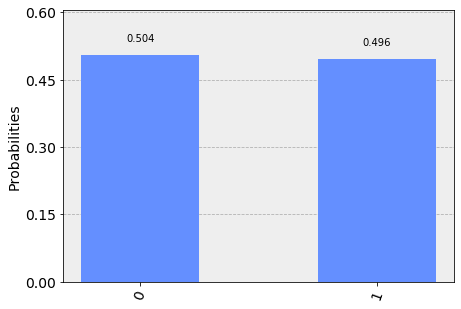

In [81]:
#Solución
circuito.measure(0,0)
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuito,simulator,shots = 10000)
result = job.result()
counts = result.get_counts(circuito)
plot_histogram(counts)

De la misma manera, podemos aplicar puertas multiqubits, como la puerta $CNOT$, que en Qiskit podremos encontrar como `cx`:

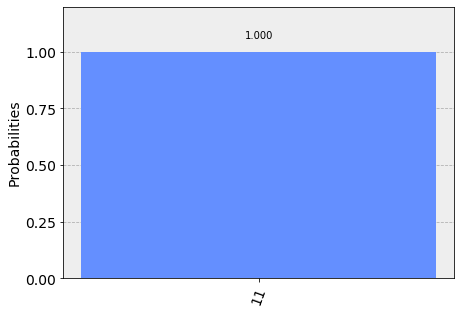

In [19]:
cnot0 = QuantumCircuit(2,2)
cnot0.x(0)
cnot0.cx(0,1)
cnot0.measure(0,0)
cnot0.measure(1,1)
circuito = cnot0
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuito,simulator,shots = 10000)
result = job.result()
counts = result.get_counts(circuito)
plot_histogram(counts)
# Se vuelve a corroborar que el primer parámetro es el de control y el segundo el dependiente

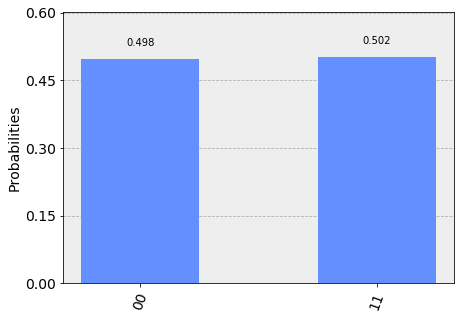

In [16]:
cnot = QuantumCircuit(2,2)
cnot.h(0)#El entrelazamiento sólo se crea cuando control está superpuesto, es decir, el primer argumento de cx
cnot.cx(0, 1)#Primer parámetro control y segundo target
cnot.measure(0,0)
cnot.measure(1,1)
circuito = cnot
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuito,simulator,shots = 10000)
result = job.result()
counts = result.get_counts(circuito)
plot_histogram(counts)

**Ejercicio:** Midiendo el circuito anterior para diferentes estados iniciales (recordad que los estados siempre se inicializan en $|0\rangle$, y que $X|0\rangle=|1\rangle$) cual es el qubit de control y cual el target? 

In [ ]:
# Solución
# El cx, el primer parámetro es el control y el segundo el target - 

# Ha mandado otro ejercicio pero no me he enterado de lo que ha pedido. Así que a esperar lo que haga esta gente. 

Existe una manera alternativa de crear los circuitos de Qiskit, y es mediante la declaración por separado del registro clásico y cuántico. Esto tiene algunas ventajas como veremos a lo largo del curso. Vamos aplicar una puerta de tres qubits, llamada *puerta de Toffoli* (`ccx` en Qiskit, aplican la puerta $x$ al target siempre y cuando los dos qubits de control estén en $|1\rangle$). Luego vamos a medir cada qubit y guardar la información en un registro clásico:

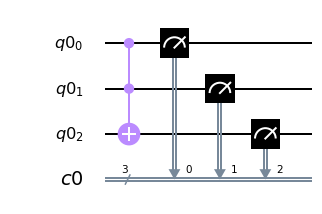

In [86]:
q = QuantumRegister(3)
c = ClassicalRegister(3)

cnot_v2 = QuantumCircuit(q, c)

cnot_v2.ccx(q[0], q[1], q[2])# Tiene 2 controles, el primer argumento y el segundo, siempre que los dos controladores estén en 1, girará el target. En todos los demás casos quedará igual

for idx in range(len(q)):
    cnot_v2.measure(q[idx], c[idx])
    
cnot_v2.draw(output = 'mpl')

## 4 - Ejecutando circuitos en chips cuánticos

Hasta ahora nos hemos en crear circuitos, y hemos hecho las mediciones utilizando uno de los simuladores de `Aer`. Pero la razón de que estemos todos aquí es la posibilidad de correr estos circuitos en ordenadores cuánticos reales. Para acceder a ellos, primero hemos de conseguir nuestro token, entrando en la página [https://quantum-computing.ibm.com/](https://quantum-computing.ibm.com/) con nuestros credenciales, clicando en la pestaña *User* (esquina superior derecha), luego clickando las pestaña *My account*. Ahi nos dara la opción, bajo la sección *Qiskit in local environment* de copiar nuestro token. Con este podremos comunicarnos desde nuestro ordenador con los chips cuánticos de IBM. Para hacerlo, hacemos lo siguiente:

In [3]:
IBMQ.save_account('2052d42c515d6c72ccd0785184e1086d854b491f8116a234aa4f3ec78816acf81c4f67dd92f83c66fc0620ec27f751ea1bcbb9d6f51d727ea58f2cf3d5af53fa')
IBMQ.load_account()
provider = IBMQ.get_provider() 

/opt/anaconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/credentials/configrc.py:130: UserWarning: Credentials already present. Set overwrite=True to overwrite.
  warnings.warn('Credentials already present. '


Podemos ver los diferentes chips a los cuales tenemos acceso chequeando los backends disponibles:

In [5]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>]

Como no estamos interesados en ninguno de los chips en particular, vamos a elegir el que menos trabajos tenga asignados en este momento:

In [4]:
backend_lb = providers.ibmq.least_busy(provider.backends(simulator=False))
print("Least busy backend: ", backend_lb)

Least busy backend:  ibmqx2


**Ejercico:** Crear un circuito con 2 qbit y aplicar una puerta Hadamard a cada qbit. Luego medid el valor de cada qubit primero con el `qasm simulator` como backend y luego con el chip cuántico que acabamos de definir (es decir `backend = backend_lb`). Tened en cuenta que ejecutar un circuito en el chip cuántico puede tardar, dependiendo de la demanda de los chips. Podeis ver el estado de los chips entrando con vuestro usuaria a las pagina [https://quantum-computing.ibm.com](https://quantum-computing.ibm.com)

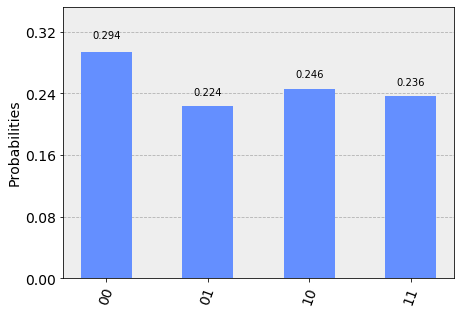

In [121]:
# Solución
two_qubit = QuantumCircuit(2, 2)
two_qubit.h(0)
two_qubit.h(1)
two_qubit.measure(0,0)
two_qubit.measure(1,1)
backend = backend_lb
counts = execute(two_qubit,
                 backend).result().get_counts()
plot_histogram(counts)